In [2]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import modal
import torch
import torch.nn as nn
import numpy as np
import trimesh

In [3]:
path = "ses-01/anat/sub-HC001_ses-01_acq-inv1_T1map.nii"

In [4]:
img = nib.load(path).get_fdata()
img = np.asarray(img)
img.shape

(240, 320, 320)

In [5]:
#transfrom data
m = np.max(img)
new_img = np.ones((img.shape[2], img.shape[0], img.shape[1], 3)).astype(np.float32)
for i in range(img.shape[2]):
    new_img[i] = np.stack((img[:, :, i], img[:, :, i], img[:, :, i]), axis=2)
new_img *= 1/m * 255 + 0.4
new_img = new_img.astype(np.uint8)


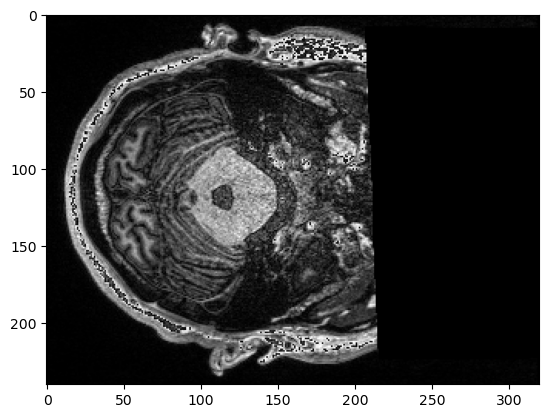

In [6]:
z = 100
plt.imshow(new_img[z, :, :])

In [8]:
from segment_anything import SamAutomaticMaskGenerator, sam_model_registry
sam = sam_model_registry["vit_l"](checkpoint="sam_vit_l_0b3195.pth")
mask_generator = SamAutomaticMaskGenerator(sam)

In [9]:
test_f = new_img[z, :, :]

In [10]:
masks = mask_generator.generate(test_f)
print(masks[0])

{'segmentation': array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]]), 'area': 36285, 'bbox': [14, 4, 200, 232], 'predicted_iou': 1.015174150466919, 'point_coords': [[175.0, 146.25]], 'stability_score': 0.9676827788352966, 'crop_box': [0, 0, 320, 240]}


In [114]:
def show_mask(mask, ax):
    color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    return mask_image

def get_point_cloud(mask, z):
    pcloud = []
    for i in range(mask.shape[0]):
        for j in range(mask.shape[1]):
            if mask[i][j] == True:
                pcloud.append((i, j, z))
                pcloud.append((i + 2, j+2, z+2))
                pcloud.append((i -2, j-2, z-2))
                pcloud.append((i + 1, j+1, z+1))
                pcloud.append((i + 1, j, z+2))
    return pcloud
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))   

In [91]:
get_point_cloud(masks[1]['segmentation'], z)

[(110, 116, 100),
 (111, 113, 100),
 (111, 114, 100),
 (111, 115, 100),
 (111, 116, 100),
 (111, 117, 100),
 (111, 118, 100),
 (112, 111, 100),
 (112, 112, 100),
 (112, 113, 100),
 (112, 114, 100),
 (112, 115, 100),
 (112, 116, 100),
 (112, 117, 100),
 (112, 118, 100),
 (112, 119, 100),
 (113, 110, 100),
 (113, 111, 100),
 (113, 112, 100),
 (113, 113, 100),
 (113, 114, 100),
 (113, 115, 100),
 (113, 116, 100),
 (113, 117, 100),
 (113, 118, 100),
 (113, 119, 100),
 (113, 120, 100),
 (114, 108, 100),
 (114, 109, 100),
 (114, 110, 100),
 (114, 111, 100),
 (114, 112, 100),
 (114, 113, 100),
 (114, 114, 100),
 (114, 115, 100),
 (114, 116, 100),
 (114, 117, 100),
 (114, 118, 100),
 (114, 119, 100),
 (114, 120, 100),
 (115, 108, 100),
 (115, 109, 100),
 (115, 110, 100),
 (115, 111, 100),
 (115, 112, 100),
 (115, 113, 100),
 (115, 114, 100),
 (115, 115, 100),
 (115, 116, 100),
 (115, 117, 100),
 (115, 118, 100),
 (115, 119, 100),
 (115, 120, 100),
 (116, 108, 100),
 (116, 109, 100),
 (116, 110

In [ ]:
plt.sca

In [1]:
masks[4]['segmentation'].shape

NameError: name 'masks' is not defined

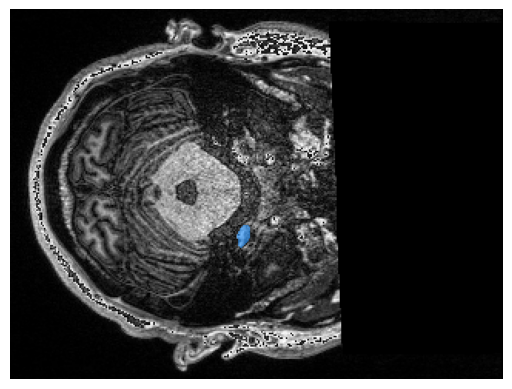

In [106]:
plt.imshow(test_f)
show_mask(masks[22]['segmentation'], plt.gca())
plt.axis('off')
plt.show() 

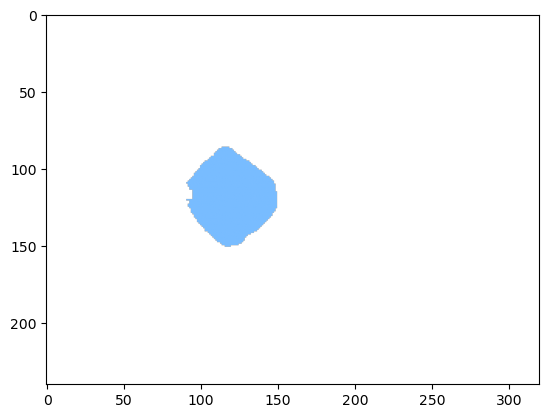

In [67]:
show_mask(masks[4]['segmentation'], plt.gca())

In [46]:
len(sam_arr)

6

In [44]:
sam_arr = []

In [45]:
# find point cloud at each height of tumor

# ten 105
for z in range(97, 103):
    sam_arr.append(mask_generator.generate(new_img[z, :, :]))
    #m = masks[22]['segmentation']

In [74]:
sam_arr[3][22]['point_coords']

[[155.0, 146.25]]

In [99]:
i = 5
for p in range(len(sam_arr[i])):
    print(str(p) + ": " + str(sam_arr[i][p]['point_coords']))

0: [[215.0, 198.75]]
1: [[155.0, 86.25]]
2: [[215.0, 146.25]]
3: [[115.0, 116.25]]
4: [[145.0, 108.75]]
5: [[315.0, 3.75]]
6: [[205.0, 78.75]]
7: [[75.0, 146.25]]
8: [[195.0, 198.75]]
9: [[135.0, 86.25]]
10: [[115.0, 221.25]]
11: [[105.0, 18.75]]
12: [[195.0, 86.25]]
13: [[185.0, 63.75]]
14: [[145.0, 86.25]]
15: [[205.0, 198.75]]
16: [[145.0, 168.75]]
17: [[195.0, 93.75]]
18: [[105.0, 18.75]]
19: [[175.0, 18.75]]
20: [[115.0, 131.25]]
21: [[85.0, 123.75]]
22: [[135.0, 26.25]]
23: [[205.0, 48.75]]
24: [[175.0, 138.75]]
25: [[195.0, 138.75]]
26: [[155.0, 18.75]]
27: [[135.0, 213.75]]


array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.

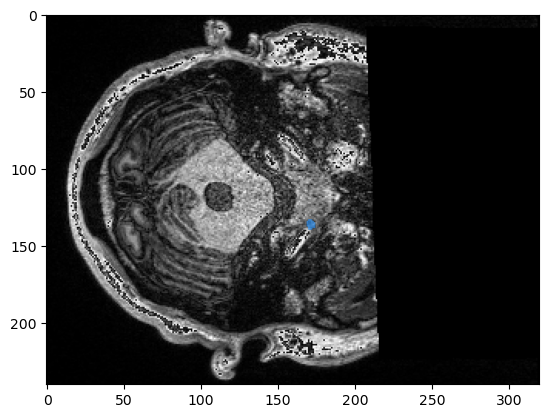

In [101]:
plt.imshow(test_f)
show_mask(sam_arr[5][24]['segmentation'], plt.gca())

In [103]:
mask_idxs = [17, 14, 15, 22, None, 24]

In [115]:
pc = []

In [116]:
len(sam_arr)

6

In [117]:
for i in range(0, len(sam_arr)):
    if mask_idxs[i] is None:
        continue
    pc += (get_point_cloud(sam_arr[i][mask_idxs[i]]['segmentation'], i + 97))

In [118]:
print(pc)

[(137, 168, 97), (139, 170, 99), (135, 166, 95), (138, 169, 98), (138, 168, 99), (137, 169, 97), (139, 171, 99), (135, 167, 95), (138, 170, 98), (138, 169, 99), (137, 170, 97), (139, 172, 99), (135, 168, 95), (138, 171, 98), (138, 170, 99), (137, 171, 97), (139, 173, 99), (135, 169, 95), (138, 172, 98), (138, 171, 99), (137, 172, 97), (139, 174, 99), (135, 170, 95), (138, 173, 98), (138, 172, 99), (138, 168, 97), (140, 170, 99), (136, 166, 95), (139, 169, 98), (139, 168, 99), (138, 169, 97), (140, 171, 99), (136, 167, 95), (139, 170, 98), (139, 169, 99), (138, 170, 97), (140, 172, 99), (136, 168, 95), (139, 171, 98), (139, 170, 99), (138, 171, 97), (140, 173, 99), (136, 169, 95), (139, 172, 98), (139, 171, 99), (138, 172, 97), (140, 174, 99), (136, 170, 95), (139, 173, 98), (139, 172, 99), (139, 167, 97), (141, 169, 99), (137, 165, 95), (140, 168, 98), (140, 167, 99), (139, 168, 97), (141, 170, 99), (137, 166, 95), (140, 169, 98), (140, 168, 99), (139, 169, 97), (141, 171, 99), (137, 1

In [119]:
mesh = trimesh.Trimesh(vertices=np.array(pc), process=False)
mesh.export('point_tumor_complete_final.ply')

b'ply\nformat binary_little_endian 1.0\ncomment https://github.com/mikedh/trimesh\nelement vertex 1935\nproperty float x\nproperty float y\nproperty float z\nelement face 0\nproperty list uchar int vertex_indices\nend_header\n\x00\x00\tC\x00\x00(C\x00\x00\xc2B\x00\x00\x0bC\x00\x00*C\x00\x00\xc6B\x00\x00\x07C\x00\x00&C\x00\x00\xbeB\x00\x00\nC\x00\x00)C\x00\x00\xc4B\x00\x00\nC\x00\x00(C\x00\x00\xc6B\x00\x00\tC\x00\x00)C\x00\x00\xc2B\x00\x00\x0bC\x00\x00+C\x00\x00\xc6B\x00\x00\x07C\x00\x00\'C\x00\x00\xbeB\x00\x00\nC\x00\x00*C\x00\x00\xc4B\x00\x00\nC\x00\x00)C\x00\x00\xc6B\x00\x00\tC\x00\x00*C\x00\x00\xc2B\x00\x00\x0bC\x00\x00,C\x00\x00\xc6B\x00\x00\x07C\x00\x00(C\x00\x00\xbeB\x00\x00\nC\x00\x00+C\x00\x00\xc4B\x00\x00\nC\x00\x00*C\x00\x00\xc6B\x00\x00\tC\x00\x00+C\x00\x00\xc2B\x00\x00\x0bC\x00\x00-C\x00\x00\xc6B\x00\x00\x07C\x00\x00)C\x00\x00\xbeB\x00\x00\nC\x00\x00,C\x00\x00\xc4B\x00\x00\nC\x00\x00+C\x00\x00\xc6B\x00\x00\tC\x00\x00,C\x00\x00\xc2B\x00\x00\x0bC\x00\x00.C\x00\x00\xc6B\x00\x0

In [109]:
import open3d as o3d

# Load the point cloud
point_cloud = o3d.io.read_point_cloud("heatmap_tab20c_point_cloud_full.ply")
point_cloud_2 = o3d.io.read_point_cloud("point_tumor.ply")

# Visualize the original point cloud
o3d.visualization.draw_geometries([point_cloud, point_cloud_2], window_name="Original Point Cloud")

# Apply Statistical Outlier Removal
# Set the number of nearest neighbors to consider and the standard deviation multiplier
cl, ind = point_cloud.remove_statistical_outlier(nb_neighbors=20, std_ratio=2.0)

# Extract the inlier point cloud
inlier_cloud = point_cloud.select_by_index(ind)

# Visualize the cleaned point cloud
o3d.visualization.draw_geometries([inlier_cloud], window_name="Cleaned Point Cloud")


[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


In [120]:
import open3d as o3d
import numpy as np

# Load the two point clouds
cloud1 = o3d.io.read_point_cloud("heatmap_tab20c_point_cloud.ply")  # Outer point cloud
cloud2 = o3d.io.read_point_cloud("point_tumor_complete_final.ply")  # Inner point cloud

# Create a visualizer
vis = o3d.visualization.Visualizer()
vis.create_window()

# Add first point cloud (with smaller size and higher opacity)
vis.add_geometry(cloud1)
opt = vis.get_render_option()
opt.point_size = 2  # Smaller point size for outer cloud
opt.background_color = np.asarray([1, 1, 1])  # Optional: Set background color


# Add second point cloud (with larger size and lower opacity)
vis.add_geometry(cloud2)
opt.point_size = 10  # Larger point size for inner cloud
# Set opacity for second point cloud (through color adjustment)
cloud2.paint_uniform_color([1, 0, 0])  # Assign red color
colors = np.asarray(cloud2.colors)

# Update and render
vis.run()
vis.destroy_window()


[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
